In [2]:
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
df = pd.read_csv("SeoulBikeData.csv")

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


To verify there are no missing values in the data frame:

In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

To see the correlations between the variables:

/var/folders/_x/qgd058bj0hb9l_991zk2z_940000gn/T/ipykernel_22071/1073366297.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr("pearson")


<Axes: >

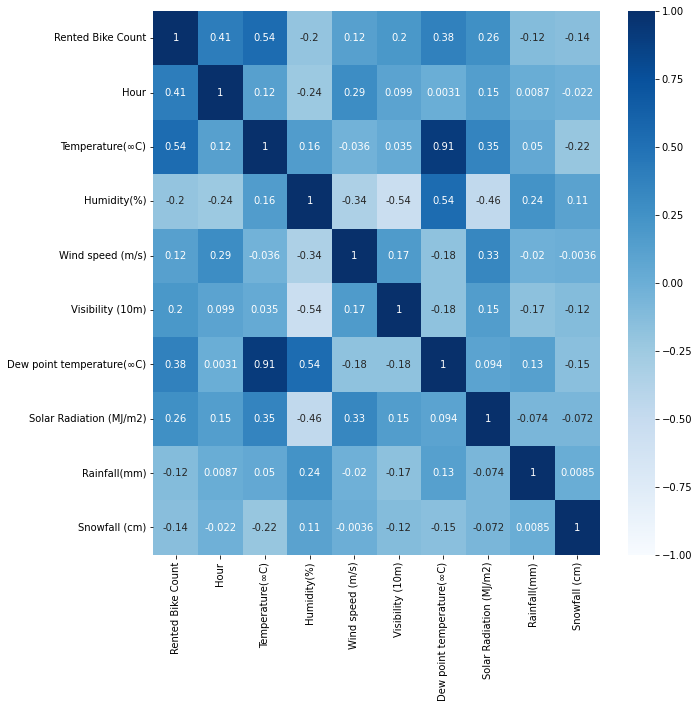

In [8]:
plt.figure(figsize = (10,10))
correlation = df.corr("pearson")
sns.heatmap(correlation, vmin = -1, vmax = 1, cmap = 'Blues', annot = True)


We see that there is a high corelation between Temperature and Dew Point Temperature, so we are dropping Dew Point Temperature. We also see that there is high correlation between 'Rented Bike Count (y)' and 'Hour', 'Temperature', 'Solar Radiation', 'Visibility'. So we are dropping as they are not as important as the ones mentioned.


Multiple Linear Regression

In [9]:
X_MultipleLR = df.drop(['Rented Bike Count','Date','Dew point temperature(∞C)', 'Humidity(%)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'Wind speed (m/s)' ], axis=1)
y = df.iloc[:, 1]
x_train, x_test, y_train, y_test = train_test_split(X_MultipleLR, y, test_size = 0.27)


In [10]:
linregfit = linear_model.LinearRegression().fit(x_train, y_train)
predtrain = linregfit.predict(x_train)
predtest = linregfit.predict(x_test)


In [11]:
linreg_train_r2score = r2_score(y_train, predtrain)
trainset_rmse = (np.sqrt(mean_squared_error(predtrain, y_train)))
print('For Multiple Linear Regression, R2 train score is : {} and the train root mean square is: {}'
     .format(linreg_train_r2score,trainset_rmse))

linreg_test_r2score = r2_score(y_test, predtest)
testset_rmse = (np.sqrt(mean_squared_error(predtest, y_test)))
print('For Multiple Linear Regression, R2 test score is : {} and the test root mean square is: {}'
     .format(linreg_test_r2score,trainset_rmse))


For Multiple Linear Regression, R2 train score is : 0.4358116189910589 and the train root mean square is: 480.9385274025647
For Multiple Linear Regression, R2 test score is : 0.42265668397157463 and the test root mean square is: 480.9385274025647


Ridge Regression with different values of alpha

In [12]:
X_RidgeRegression = df.drop(['Rented Bike Count','Date','Dew point temperature(∞C)', 'Humidity(%)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'Wind speed (m/s)'], axis=1)
y = df.iloc[:, 1]
x_train, x_test, y_train, y_test = train_test_split(X_RidgeRegression, y, test_size = 0.27)

In [18]:
error = []
coefficients = []

#different values for alpha
alphas = [0, 10, 1000, 5000, 10000000]
for alpha in alphas:
    linridge = Ridge(alpha = alpha).fit(x_train, y_train)
    linridge_train_r2score = linridge.score(x_train, y_train)
    linridge_test_r2score = linridge.score(x_test, y_test)
    coefficients.append(linridge.coef_)
    error.append(np.mean(linridge.predict(x_test)-y_test) ** 2)
    print('Alpha = {:.2f}\n \
R2 training: {:.2f}, R2 test: {:.2f}\n'
      .format(alpha, linridge_train_r2score, linridge_test_r2score))

Alpha = 0.00
 R2 training: 0.43, R2 test: 0.44

Alpha = 10.00
 R2 training: 0.43, R2 test: 0.44

Alpha = 1000.00
 R2 training: 0.43, R2 test: 0.44

Alpha = 5000.00
 R2 training: 0.43, R2 test: 0.44

Alpha = 10000000.00
 R2 training: 0.10, R2 test: 0.09



Lasso Regression with different values of alpha

In [ ]:
error = []
coefficients = []

#different values for alpha
alphas = [-4000, -1000, -10, 0, 10, 1000, 5000, 10000000]
for items in alphas:
    linlasso = Lasso(alpha = items).fit(x_train, y_train)
    linlasso_train_r2score = linlasso.score(x_train, y_train)
    linlasso_test_r2score = linlasso.score(x_test, y_test)
    coefficients.append(linlasso.coef_)
    error.append(np.mean(linlasso.predict(x_test)-y_test) ** 2)
    print('Alpha = {:.2f}\n \
    R2 training: {:.2f}, R2 test: {:.2f}\n'
      .format(items, linlasso_train_r2score, linlasso_test_r2score))

Alpha = -4000.00
     R2 training: -65.25, R2 test: -71.30

Alpha = -1000.00
     R2 training: -3.67, R2 test: -4.10

Alpha = -10.00
     R2 training: 0.44, R2 test: 0.42

Alpha = 0.00
     R2 training: 0.44, R2 test: 0.42

Alpha = 10.00
     R2 training: 0.44, R2 test: 0.42

Alpha = 1000.00
     R2 training: 0.38, R2 test: 0.36

Alpha = 5000.00
     R2 training: 0.04, R2 test: 0.04

Alpha = 10000000.00
     R2 training: 0.00, R2 test: -0.00



/Users/snehabhattacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.294e+08, tolerance: 2.687e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/snehabhattacharya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.448e+09, tolerance: 2.687e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

The best R2 scores are that from Ridge: 

R2 training: 0.44, R2 test: 0.42